In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
#import data
file_path = '/content/drive/My Drive/Crime_Data_from_2020_to_Present.csv'
data = pd.read_csv(file_path)

In [3]:
data.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694915 entries, 0 to 694914
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           694915 non-null  int64  
 1   Date Rptd       694915 non-null  object 
 2   DATE OCC        694915 non-null  object 
 3   TIME OCC        694915 non-null  int64  
 4   AREA            694915 non-null  int64  
 5   AREA NAME       694915 non-null  object 
 6   Rpt Dist No     694915 non-null  int64  
 7   Part 1-2        694915 non-null  int64  
 8   Crm Cd          694915 non-null  int64  
 9   Crm Cd Desc     694915 non-null  object 
 10  Mocodes         599352 non-null  object 
 11  Vict Age        694915 non-null  int64  
 12  Vict Sex        603869 non-null  object 
 13  Vict Descent    603863 non-null  object 
 14  Premis Cd       694907 non-null  float64
 15  Premis Desc     694549 non-null  object 
 16  Weapon Used Cd  241434 non-null  float64
 17  Weapon Des

In [5]:
data.shape

(694915, 28)

In [6]:
data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            95563
Vict Age               0
Vict Sex           91046
Vict Descent       91052
Premis Cd              8
Premis Desc          366
Weapon Used Cd    453481
Weapon Desc       453481
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          643099
Crm Cd 3          693168
Crm Cd 4          694863
LOCATION               0
Cross Street      582058
LAT                    0
LON                    0
dtype: int64

In [7]:
#dropping the unnecessary columns
data.drop([ 'Date Rptd', 'Rpt Dist No' , 'Part 1-2',  'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',  'LOCATION','LAT','LON','Cross Street', 'Mocodes' ], axis=1, inplace=True)
data.head(1)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc
0,10304468,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other


In [8]:
# Handle missing values
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

data.shape

(241177, 16)

In [9]:
#Handling the outliers in Vict Age column
Q1 = data['Vict Age'].quantile(0.25)
Q3 = data['Vict Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Vict Age'] >= lower_bound) & (data['Vict Age'] <= upper_bound) & (data['Vict Age'] > 0) & (data['Vict Age'] != -1)]


In [10]:
data.isnull().sum()

DR_NO             0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
dtype: int64

In [11]:
data.shape

(220565, 16)

In [12]:
# Split 'DATE OCC' into year, month and day.
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data['YEAR_OCC'] = data['DATE OCC'].dt.year
data['MONTH_OCC'] = data['DATE OCC'].dt.month
data['DAY_OCC'] = data['DATE OCC'].dt.day
data.head(1)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,YEAR_OCC,MONTH_OCC,DAY_OCC
0,10304468,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,2020,1,8


In [13]:
data.describe()

,DR_NO,TIME OCC,AREA,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,YEAR_OCC,MONTH_OCC,DAY_OCC
count,2.205650e+05,220565.000000,220565.000000,220565.000000,220565.000000,220565.000000,220565.000000,220565.000000,220565.000000,220565.000000
mean,2.128398e+08,1350.093016,10.538834,512.962968,37.094108,317.907356,364.108685,2021.161086,6.214436,15.597987
std,9.470837e+06,671.051940,6.253382,239.804419,14.886030,216.621937,120.939670,0.941263,3.467515,8.859221
min,1.030447e+07,1.000000,1.000000,110.000000,2.000000,101.000000,101.000000,2020.000000,1.000000,1.000000
25%,2.018149e+08,910.000000,5.000000,230.000000,26.000000,102.000000,312.000000,2020.000000,3.000000,8.000000
50%,2.114070e+08,1430.000000,11.000000,624.000000,35.000000,221.000000,400.000000,2021.000000,6.000000,16.000000
75%,2.210106e+08,1915.000000,16.000000,626.000000,48.000000,502.000000,400.000000,2022.000000,9.000000,23.000000
max,2.399097e+08,2359.000000,21.000000,956.000000,79.000000,971.000000,516.000000,2023.000000,12.000000,31.000000


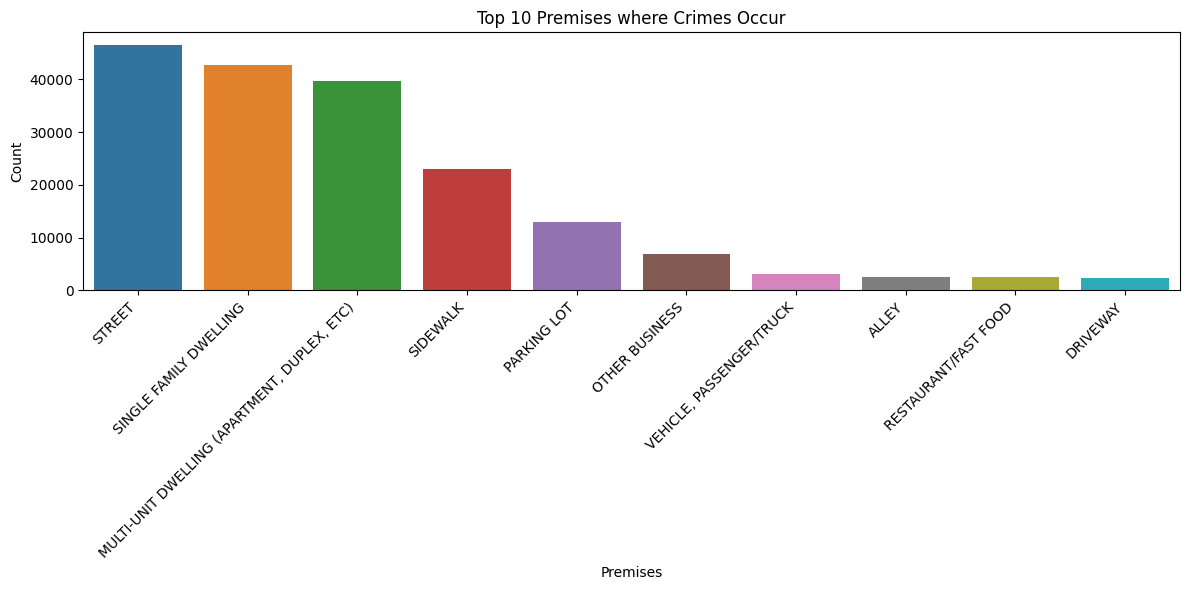

In [14]:
# Premises Analysis
premis_counts = data['Premis Desc'].value_counts().head(10)

# Plotting the top 10 premises where crimes occur
plt.figure(figsize=(12, 6))  # Increase the figure width to allow more space for labels
sns.countplot(data=data, x='Premis Desc', order=premis_counts.index)
plt.title('Top 10 Premises where Crimes Occur')
plt.xlabel('Premises')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the layout to prevent labels from overlapping
plt.show()

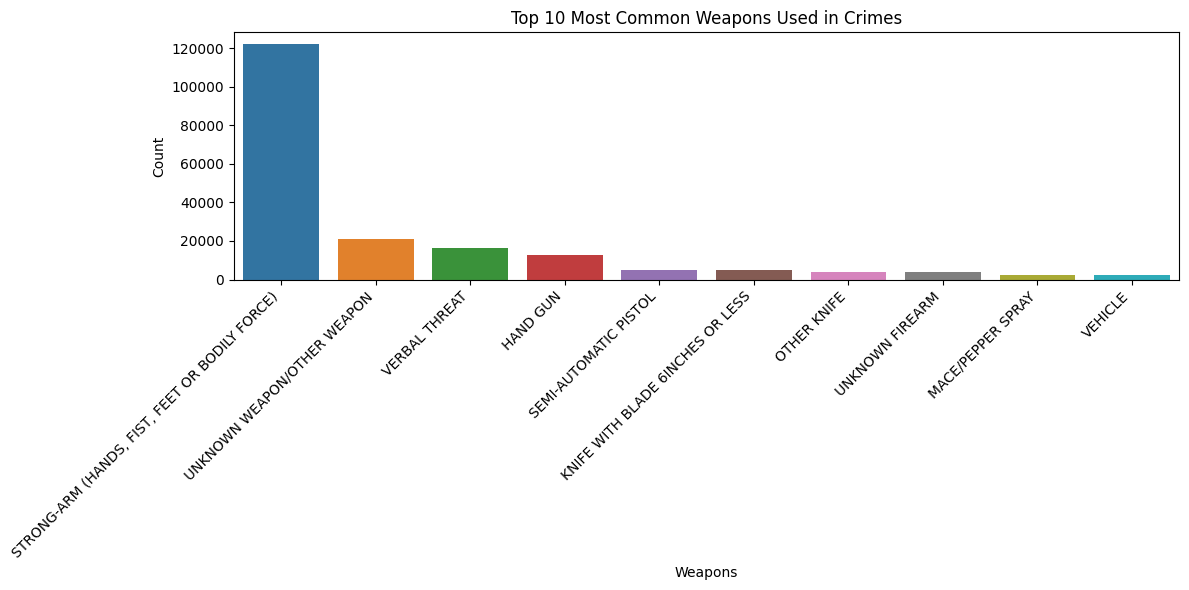

In [15]:
# Weapons Analysis
weapon_counts = data['Weapon Desc'].value_counts().head(10)

# Plotting the top 10 most common weapons used in crimes
plt.figure(figsize=(12, 6))  # Increase the figure width to allow more space for labels
sns.countplot(data=data, x='Weapon Desc', order=weapon_counts.index)
plt.title('Top 10 Most Common Weapons Used in Crimes')
plt.xlabel('Weapons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the layout to prevent labels from overlapping
plt.show()

<ipython-input-16-2a2c5938a2b9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


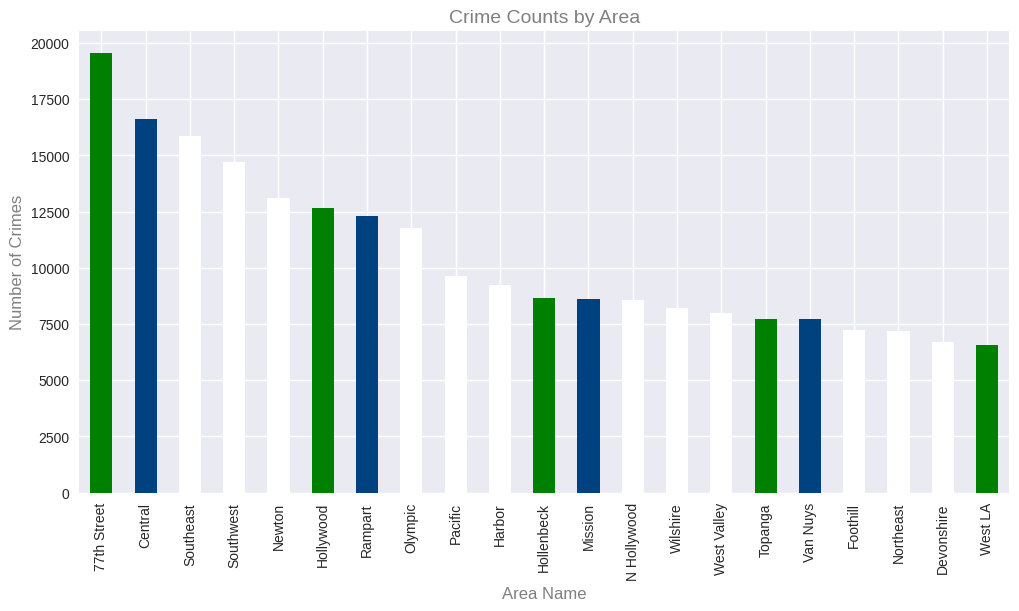

In [16]:
#Number of Crimes according to areas
plt.style.use("seaborn")
color=plt.cm.ocean(np.linspace(0,2,5))

fig, ax = plt.subplots(figsize=(12, 6))
data["AREA NAME"].value_counts().plot.bar(color=color)

plt.xlabel('Area Name', fontsize=12, color='gray')
plt.ylabel('Number of Crimes', fontsize=12, color='gray')
plt.title('Crime Counts by Area', fontsize=14, color='gray')

plt.show()


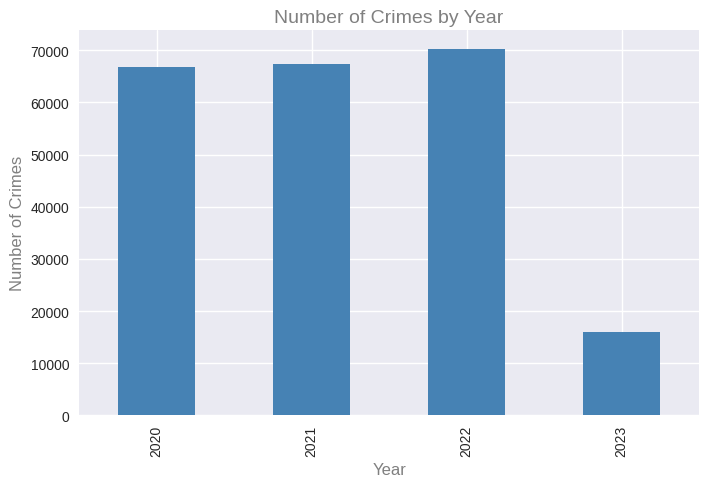

In [17]:
# Group the data by year and count the number of crimes
crimeByYear = data.groupby('YEAR_OCC').size()

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 5))
crimeByYear.plot(kind='bar', color='steelblue')

plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Number of Crimes', fontsize=12, color='gray')
plt.title('Number of Crimes by Year', fontsize=14, color='gray')

plt.show()

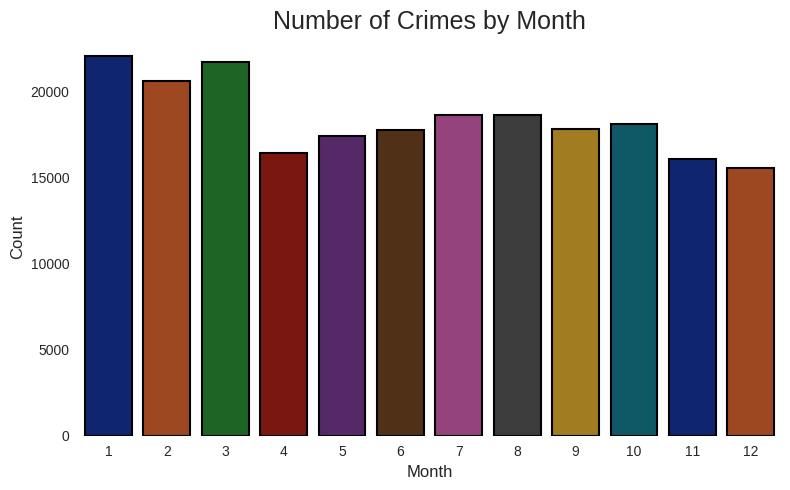

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="MONTH_OCC", data=data, palette="dark")

# Set the facecolor of the bars to a transparent color
ax.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set the linewidth and edgecolor of the bars
for bar in ax.patches:
    bar.set_linewidth(1.5)
    bar.set_edgecolor('black')

plt.title("Number of Crimes by Month", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


### Victims Categorization by Ethinicity

In [19]:
data.loc[(data["Vict Descent"] == 'H'), 'Vict Descent'] = 'Hispanic/Latin/Mexican'
data.loc[(data["Vict Descent"] == 'B'), 'Vict Descent'] = 'Black'
data.loc[(data["Vict Descent"] == 'W'), 'Vict Descent'] = 'White'
data.loc[(data["Vict Descent"] == 'A'), 'Vict Descent'] = 'Other Asian'
data.loc[(data["Vict Descent"] == 'X'), 'Vict Descent'] = 'Unknown'
data.loc[(data["Vict Descent"] == 'C'), 'Vict Descent'] = 'Chinese'
data.loc[(data["Vict Descent"] == 'D'), 'Vict Descent'] = 'Combodian'
data.loc[(data["Vict Descent"] == 'F'), 'Vict Descent'] = 'Filipino'
data.loc[(data["Vict Descent"] == 'G'), 'Vict Descent'] = 'Guamanian'
data.loc[(data["Vict Descent"] == 'I'), 'Vict Descent'] = 'America Indian/Alaskan Native'
data.loc[(data["Vict Descent"] == 'J'), 'Vict Descent'] = 'Japanese'
data.loc[(data["Vict Descent"] == 'K'), 'Vict Descent'] = 'Korean'
data.loc[(data["Vict Descent"] == 'L'), 'Vict Descent'] = 'Laotian'
data.loc[(data["Vict Descent"] == 'O'), 'Vict Descent'] = 'Other'
data.loc[(data["Vict Descent"] == 'S'), 'Vict Descent'] = 'Samoan'
data.loc[(data["Vict Descent"] == 'U'), 'Vict Descent'] = 'Hawaiian'
data.loc[(data["Vict Descent"] == 'V'), 'Vict Descent'] = 'Vietnamese'
data.loc[(data["Vict Descent"] == 'Z'), 'Vict Descent'] = 'Asian Indian'


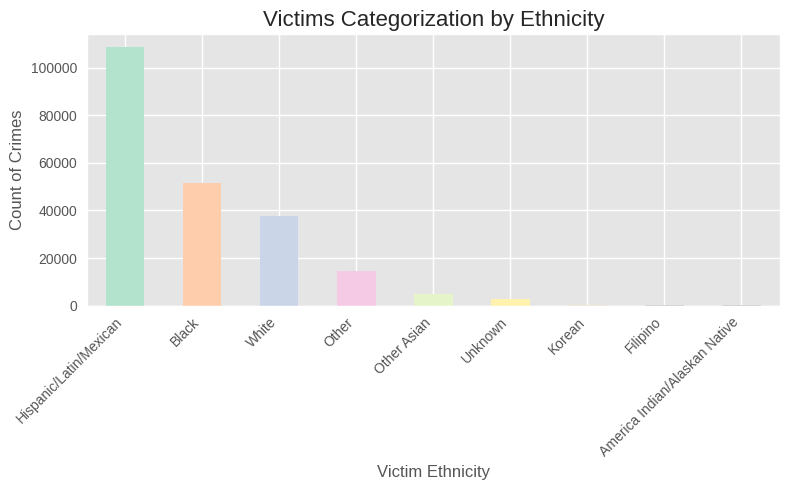

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
color = plt.cm.Pastel2(np.linspace(0, 1, 9))

data["Vict Descent"].value_counts()[:9].plot(kind='bar', color=color)

plt.title('Victims Categorization by Ethnicity', fontsize=16)
plt.xlabel('Victim Ethnicity', fontsize=12)
plt.ylabel('Count of Crimes', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


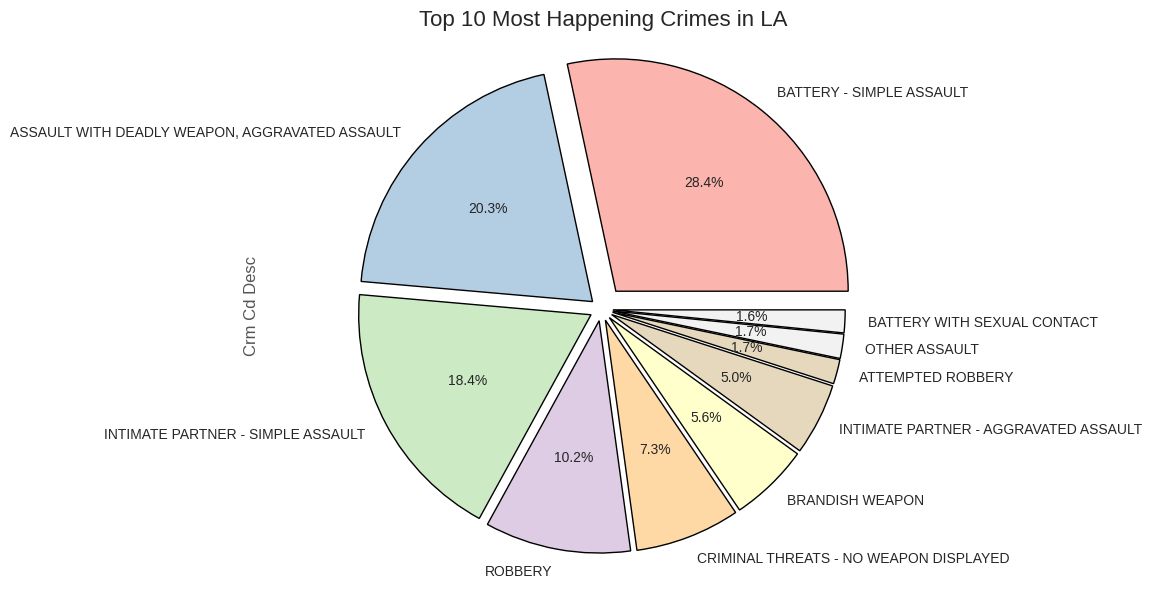

In [21]:
#Top 10 Most Happening Crimes in LA
plt.figure(figsize=(10, 6))
explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))

data["Crm Cd Desc"].value_counts()[:10].plot.pie(
    explode=explode,
    autopct="%1.1f%%",
    colors=colors,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)

plt.title("Top 10 Most Happening Crimes in LA", fontsize=16)
plt.axis("equal")

plt.tight_layout()
plt.show()


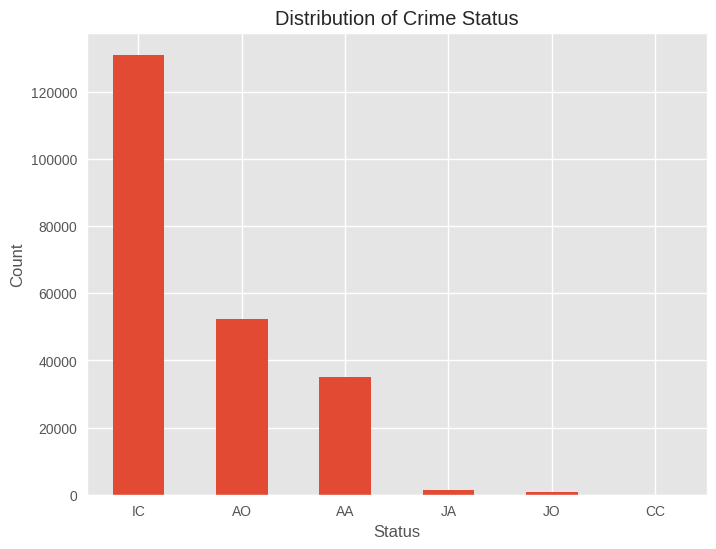

In [22]:
# Status Analysis
status_counts = data['Status'].value_counts()

# Plotting the distribution of different crime statuses
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.title('Distribution of Crime Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

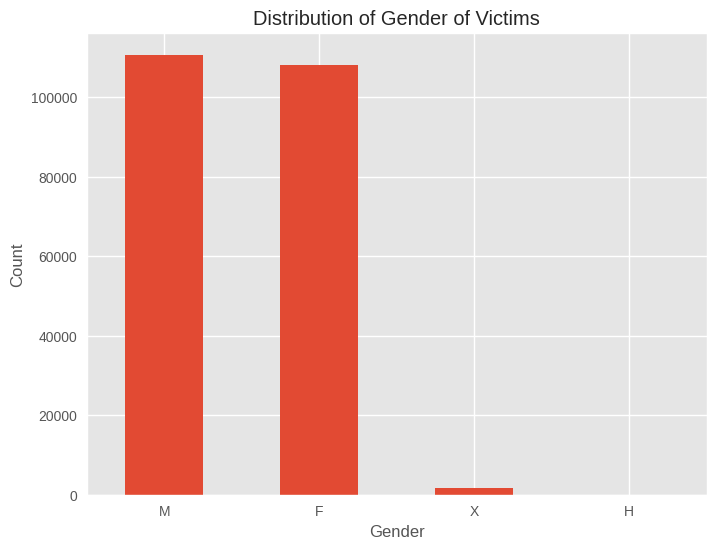

In [23]:
# Gender Analysis
gender_counts = data['Vict Sex'].value_counts()

# Plotting the distribution of gender of victims
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

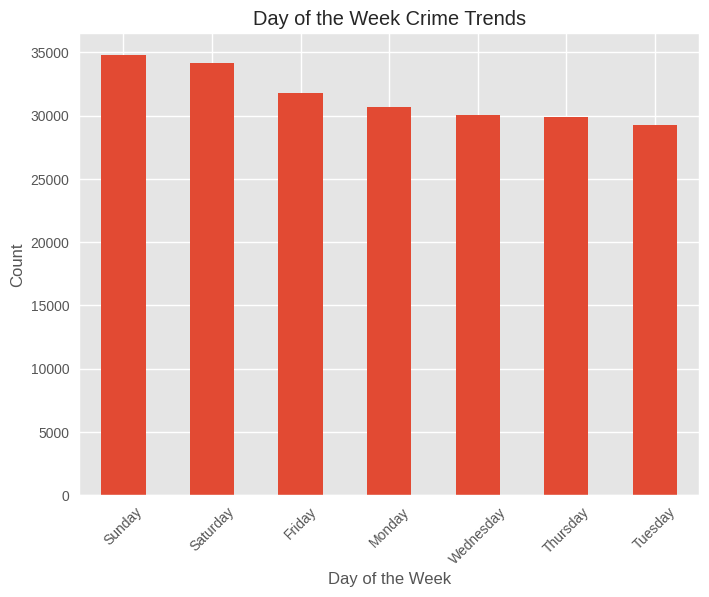

In [24]:
# Temporal Analysis - Day of the Week Crime Trends
data['Day of Week'] = data['DATE OCC'].dt.day_name()
day_of_week_counts = data['Day of Week'].value_counts()

# Plotting the day of the week crime trends
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Day of the Week Crime Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

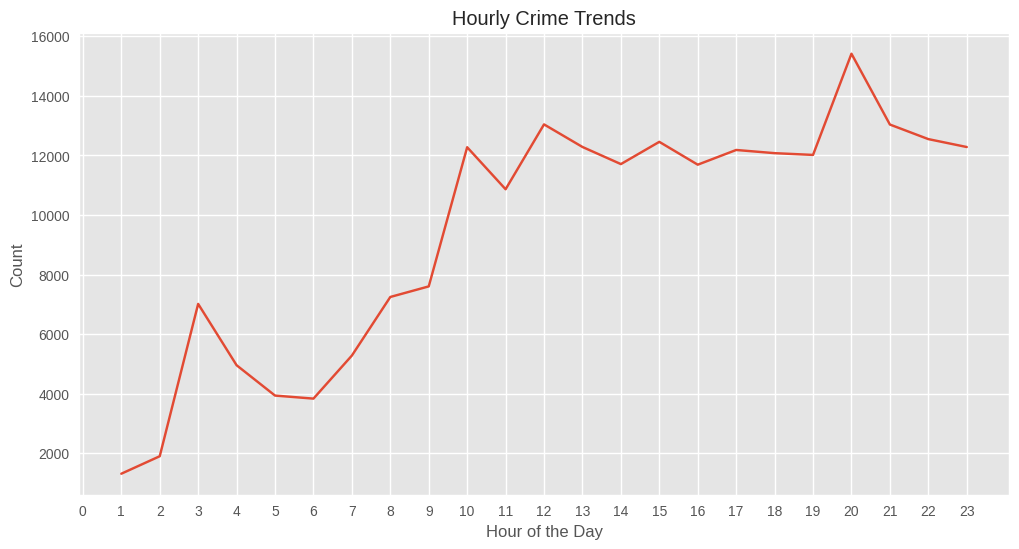

In [25]:
# Temporal Analysis - Hourly Crime Trends
data['Hour'] = pd.to_datetime(data['TIME OCC'], format='%H%M', errors='coerce').dt.hour
hourly_counts = data['Hour'].value_counts().sort_index()

# Plotting the hourly crime trends
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line')
plt.title('Hourly Crime Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.show()

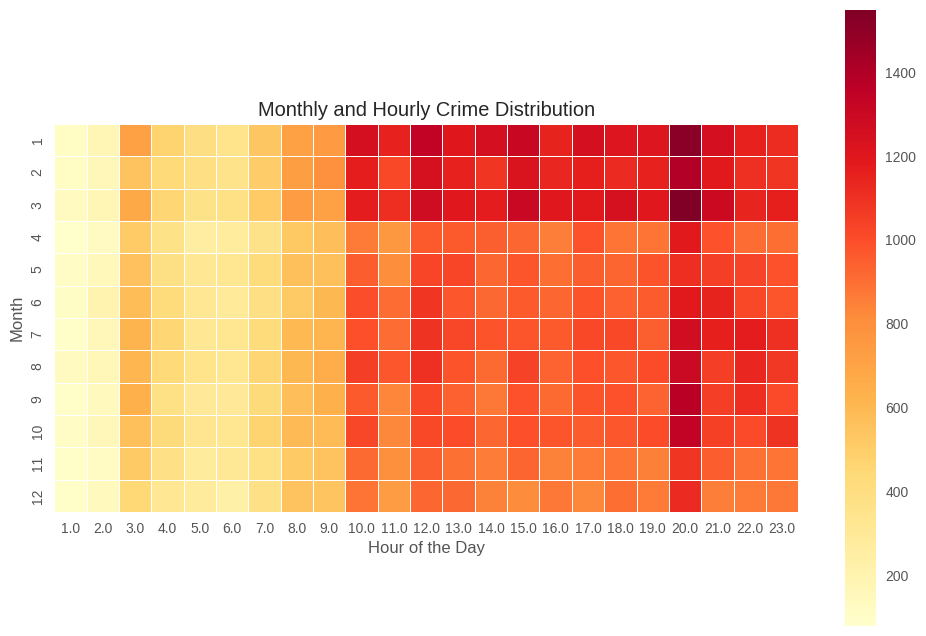

In [26]:
# Temporal Analysis - Heatmap of Monthly and Hourly Crime Distribution
monthly_hourly_counts = data.groupby([data['DATE OCC'].dt.month, data['Hour']]).size().unstack()

# Plotting the heatmap of monthly and hourly crime distribution
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_hourly_counts, cmap='YlOrRd', square=True, linewidths=0.5)
plt.title('Monthly and Hourly Crime Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.show()

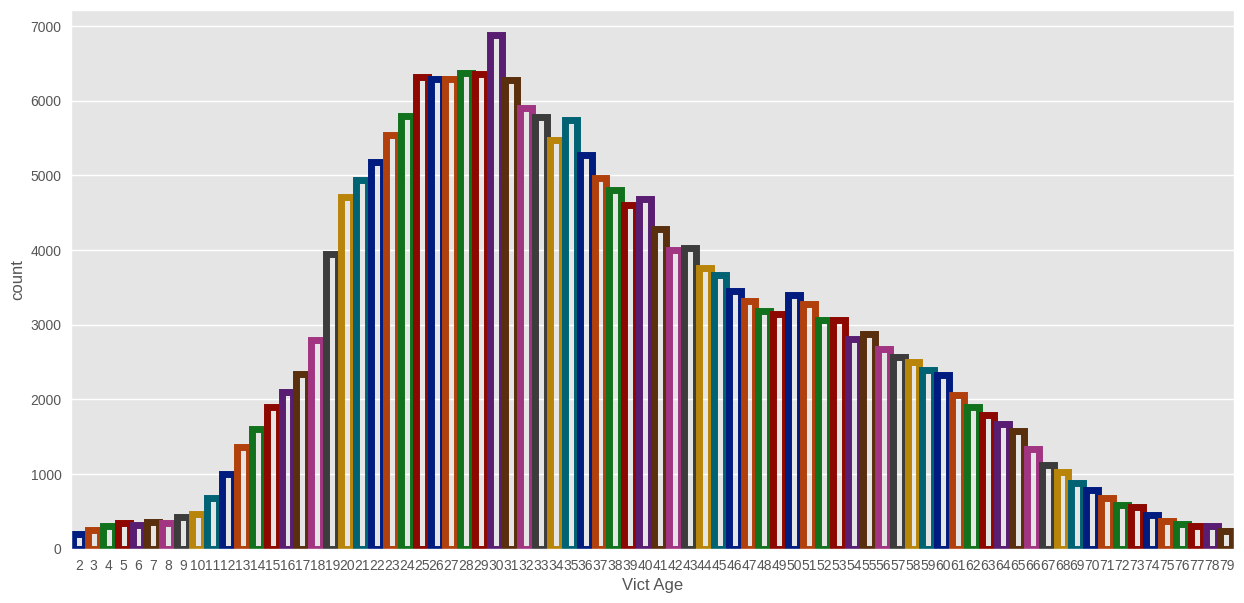

In [27]:
#Plotting Vict age distribution.
plt.figure(figsize=(15,7))
ax = sns.countplot(x="Vict Age", data=data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))